In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
raw_file_path = "../data/raw/AAPL.csv"
df = pd.read_csv(raw_file_path)

df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.71607971191406,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
3,2020-01-03,72.0091323852539,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
4,2020-01-06,72.58292388916016,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200


In [21]:
df = df.iloc[2:, :]
df.columns = ["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"]
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2,2020-01-02,72.71607971191406,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
3,2020-01-03,72.0091323852539,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
4,2020-01-06,72.58292388916016,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
5,2020-01-07,72.24156188964844,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000
6,2020-01-08,73.40363311767578,75.79750061035156,76.11000061035156,74.29000091552734,74.29000091552734,132079200


In [22]:
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2,2020-01-02,72.71607971191406,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
3,2020-01-03,72.0091323852539,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
4,2020-01-06,72.58292388916016,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
5,2020-01-07,72.24156188964844,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000
6,2020-01-08,73.40363311767578,75.79750061035156,76.11000061035156,74.29000091552734,74.29000091552734,132079200


In [23]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [24]:
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,72.71607971191406,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
1,2020-01-03,72.0091323852539,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
2,2020-01-06,72.58292388916016,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
3,2020-01-07,72.24156188964844,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000
4,2020-01-08,73.40363311767578,75.79750061035156,76.11000061035156,74.29000091552734,74.29000091552734,132079200


In [27]:
df.dtypes

Date         datetime64[ns]
Adj Close            object
Close                object
High                 object
Low                  object
Open                 object
Volume               object
dtype: object

In [29]:
# For each price-related column, convert to numeric
for col in ["Open", "High", "Low", "Close", "Adj Close"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [30]:
processed_file_path = "../data/processed/AAPL.csv"
df.to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")

Processed data saved to ../data/processed/AAPL.csv


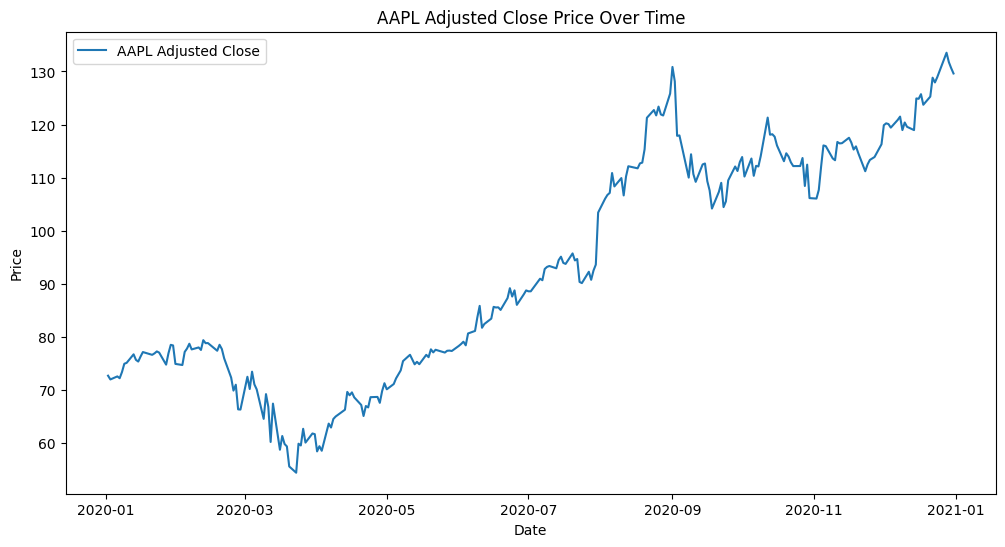

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Adj Close"], label="AAPL Adjusted Close")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Adjusted Close Price Over Time")
plt.legend()
plt.show()

In [34]:
df = pd.read_csv("../data/processed/300760.SZ.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-01-03,294.021149,311.359985,317.000000,309.000000,315.970001,4468556
1,2023-01-04,300.716370,318.450012,320.679993,310.079987,311.299988,4226437
2,2023-01-05,302.321655,320.149994,323.489990,315.200012,320.989990,5128916
3,2023-01-06,300.385803,318.100006,323.959991,316.000000,321.119995,4364555
4,2023-01-09,300.895752,318.640015,320.769989,315.970001,318.179993,3531384


In [35]:
df.dtypes

Date         datetime64[ns]
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
dtype: object

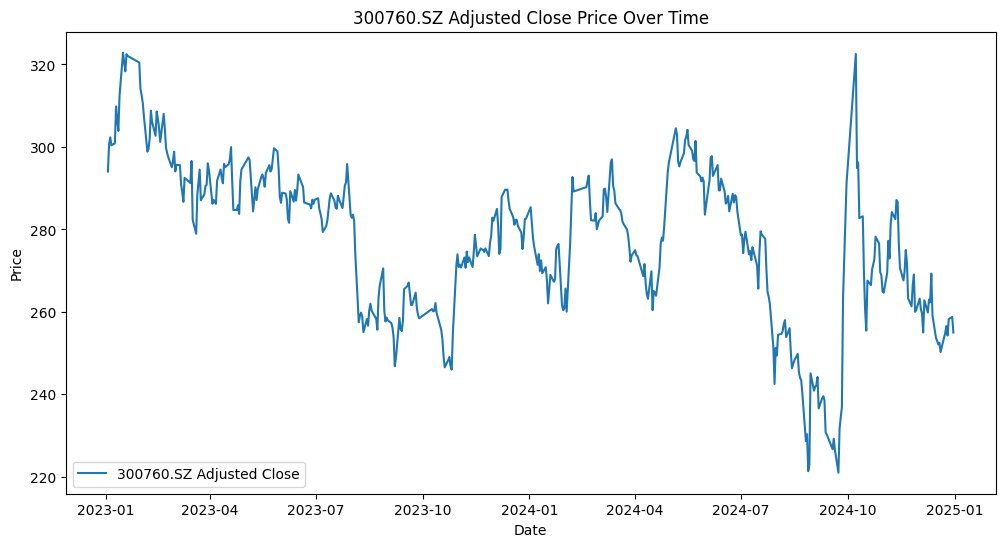

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Adj Close"], label="300760.SZ Adjusted Close")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("300760.SZ Adjusted Close Price Over Time")
plt.legend()
plt.show()